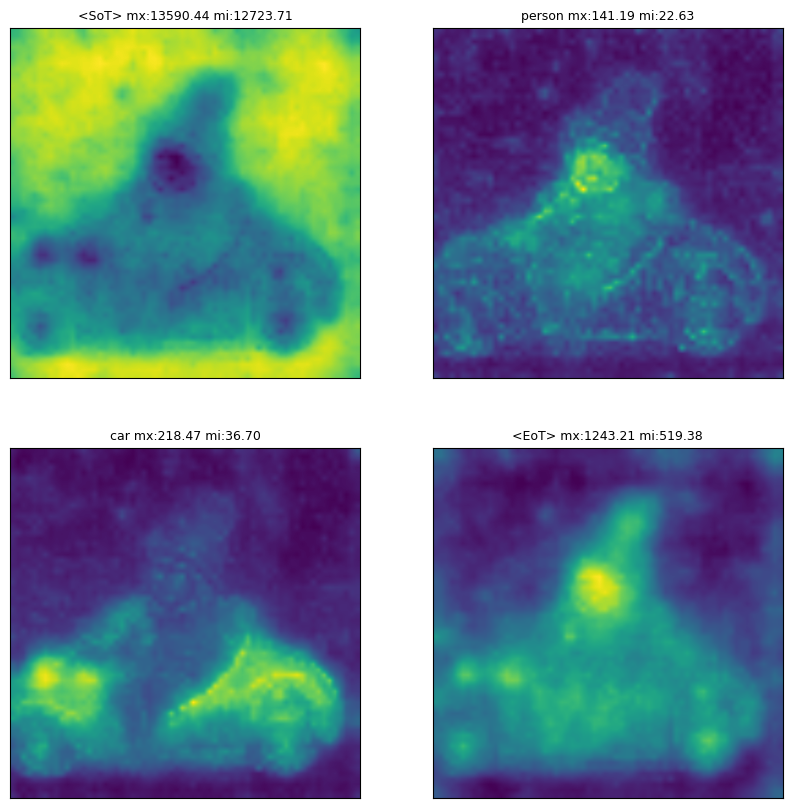

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
with open(
    f"/data/Felix/github/syntagen_submission_work_dir/work_dirs/datadif_prompts_voc_sd15_05_27_21_01/activation_data/attentionmap_0_descriptive.pickle", "rb"
) as f:
    activation = pickle.load(f)
    class_names = pickle.load(f)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
for i,attention_map in enumerate(activation):
    # Set values above the threshold to 1 and the rest to 0
    axes[i].imshow(attention_map)
    #axes[i].imshow(attention_map,cmap=cmap,norm=norm)
    try:
        axes[i].set_title(class_names[i]+f" mx:{np.max(attention_map):.2f}"+f" mi:{np.min(attention_map):.2f}", fontsize=9)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    except:
        pass
fig.savefig("attention_decriptive.png")

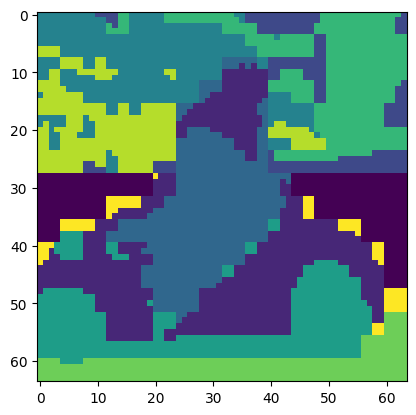

In [6]:
from utils.utils import split_regions, kmeans_attention
from skimage.transform import resize
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open(
    f"/data/Felix/github/syntagen_submission_work_dir/work_dirs/datadif_prompts_voc_sd15_05_27_21_01/cluster_data/cluster_0_all_attention_pca.pickle", "rb"
) as f:
    all_resolutions_pca = pickle.load(f)

final_clusters_pca,id_clusters_pca=kmeans_attention(all_resolutions_pca,num_clusters=10)

upsampled_clusters_pca=resize(final_clusters_pca, (final_clusters_pca.shape[0],512, 512), mode='edge',anti_aliasing=False)
upsampled_clusters_pca=np.argmax(upsampled_clusters_pca,axis=0)
one_hot_encoded = np.eye(final_clusters_pca.shape[0])[upsampled_clusters_pca]
upsampled_clusters_pca=np.transpose(one_hot_encoded,(2,0,1)).astype(np.uint8)
upsampled_clusters_pca_refined=split_regions(upsampled_clusters_pca)

plt.figure()
plt.imshow(np.argmax(final_clusters_pca,axis=0))
plt.savefig(f'cluster_img_10_pca_refined.png')
